In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to a 1D array
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons, ReLU activation
    Dense(64, activation='relu'),   # Second hidden layer with 64 neurons, ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons for 10 classes, softmax activation
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8770 - loss: 0.4208 - val_accuracy: 0.9564 - val_loss: 0.1359
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9671 - loss: 0.1060 - val_accuracy: 0.9713 - val_loss: 0.0892
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9796 - loss: 0.0670 - val_accuracy: 0.9736 - val_loss: 0.0824
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9848 - loss: 0.0496 - val_accuracy: 0.9771 - val_loss: 0.0827
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9877 - loss: 0.0392 - val_accuracy: 0.9792 - val_loss: 0.0736


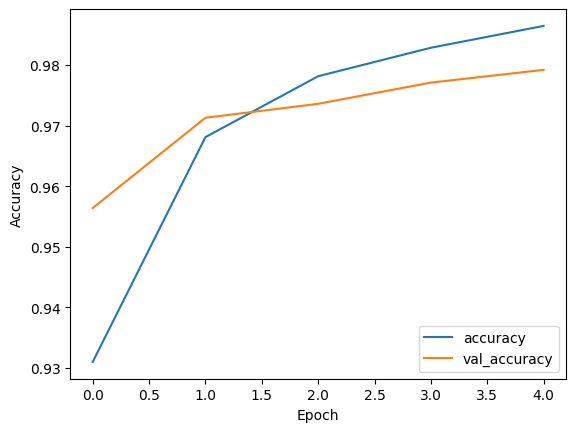

In [5]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [6]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9755 - loss: 0.0851
Test accuracy: 0.979200005531311


In [7]:
# Visualize an example image from the test set
import numpy as np

# Select a random image index
idx = np.random.randint(0, len(x_test))


In [8]:
# Get the corresponding image and label
img = x_test[idx]
label = y_test[idx]

In [9]:
# Reshape the image to 28x28 for visualization
img = np.reshape(img, (28, 28))

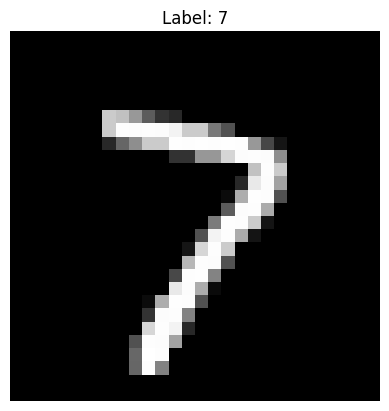

In [10]:
# Plot the image
plt.imshow(img, cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()